<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/Lewis_CodeChallengeMoreQwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-255-57cc3ff34e24>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


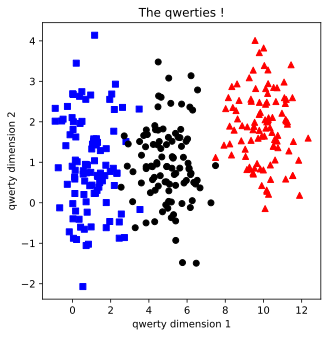

In [256]:
#Create the data

numberPerCluster = 100
blur = 1 #this is my standard deviation, how far points are apart
# x and y center quartenants for the data cloud
#so, A will be center with x=1, y=1
# B will be center with x=5, y=1
# C will be center with x=10, y = 1
A = [1,1]
B = [5,1]
C = [10,2]

#Generate Data
#Here I'll add random numbers to each element value in vector A, B and C, so x and y will be assigned a random value points for A, B and C
a = [A[0]+ np.random.randn(numberPerCluster)*blur, A[1]+ np.random.randn(numberPerCluster)*blur]
b = [B[0] + np.random.randn(numberPerCluster)*blur, B[1]+ np.random.randn(numberPerCluster)*blur]
c = [C[0] + np.random.randn(numberPerCluster)* blur, C[1] + np.random.randn(numberPerCluster)* blur]

#Here I create the Category Labels - dummy coded category labels - converting to numbers
#For three qwerties A, B, C:  one-thrid is qwerty type ZEROS, two-third is qwerty tpe ONES, three-third is qwerty type TWOS. ?
#This creates the categories
                                                                                      #creating an array 100 twos by multiplying an array of 100 ones by 2
labels_np = np.vstack((np.zeros((numberPerCluster,1)), np.ones((numberPerCluster,1)), 1+ np.ones((numberPerCluster,1))))


#here I'm stacking each vector into one data matrix (array) - concatenate into a matrix using T - Transpose
data_np = np.hstack((a,b,c)).T

#Convert to a pytorch tensor - a vector in pytorch
data = torch.tensor(data_np).float()
#labels = torch.tensor(labels_np).long(). #my original code
labels = torch.squeeze(torch.tensor(labels_np).long())  #new used torch.squeeze (removes 1 dimension ?)

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^')
plt.title('The qwerties !')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
#plt.label('qwery dimensin 3')
plt.show()




A numpy array class 'numpy.ndarray'> (300, 2)

A numpy array converted into a tensor (matrix) 300 for individual data points 2 refers to the x and y values <class 'torch.Tensor'> torch.Size([200, 2])


In [257]:
#Extra - Inspect data types
#output shows total 300 elements, 100 elements in each array, 2 refers to the x and y values
print(type(data_np)) #numpy data type
print(np.shape(data_np)) #shape 300 elements total in three arrays - matrices
print(' ')

print(type(data)) #tensor torch data type
print(np.shape(data)) #shape same, 300 elements total in three different arrays - matrices

<class 'numpy.ndarray'>
(300, 2)
 
<class 'torch.Tensor'>
torch.Size([300, 2])


In [259]:
#Build Model Architecture. - Sequential model architecture
ANNclassify = nn.Sequential(
    nn.Linear(2,4),  #two input values and 4 outputs that go to four nodes in the input layer
    nn.ReLU(),
    nn.Linear(4,3),  #output layer with three ouput nodes, receives four input values and send three output values
    nn.Softmax(dim=1) #final activatin unit - however not necessary because the nn.CrossEntropyLoss() function implments Softmax()
    #nn.Sigmoid(),
)

#Other model features
learningRate = .01

#use the CorssEntropyLoss() function instead even thought it's redundant BCELoss more efficient ?
#lossfun = nn.BCELoss()
lossfun = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

#Displays ANN mnodel configuration
#ANNclassify.

In [260]:
#test the model with data
yHat = ANNclassify(data) #run feed forward to test data
print(data.shape) #input  is data- displays the size of the data matrix , 300 qwerties by two inputs x and y
print(yHat.shape) #output is result in yHat - Softmax output 300 qwerties by 3 categories
#yHat
#output - each row must sum to 1 (one), Softmax function output, all numbers will be betwen zero and one
                 #after the model trains, one of the three numbers in the row is close to one and the other two are close to zero
                  #shows the model probability of one category is a high probability and the others lower probability


torch.Size([300, 2])
torch.Size([300, 3])


Softmax output in variable yHat
[0.0395, 0.0186, 0.9419],
[0.0265, 0.0120, 0.9615],
[0.0266, 0.0125, 0.9609],
[0.0285, 0.0134, 0.9581],
[0.0230, 0.0105, 0.9665],

output of data.shape
torch.Size([300, 2])
torch.Size([300, 3])

In [261]:
#Train the Model

numepochs = 10000 #iterations

#initialize losses
losses = torch.zeros(numepochs)

ongoingAcc = []

#iterates over epochs
for epochi in range(numepochs):

        #forward pass
       yHat = ANNclassify(data)

       #compute Loss
       loss = lossfun(yHat,labels)

       losses[epochi] = loss

       #back propagation
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       #compute accuracy at each epoch - iteration of training
       matches = torch.argmax(yHat,axis=1) == labels #booleans (false/true)
       matchesNumeric = matches.float()  #convert to numbers (0/1)
       accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
       ongoingAcc.append(accuracyPct) # add to list of accuracies

       #final forward
       predictions = ANNclassify(data)

       prelabels= torch.argmax(predictions, axis=1)
       totalacc = 100*torch.mean((prelabels == labels).float())



Output accuracy improves tremendously at the begining.

Final Accuracy: 98.3333%


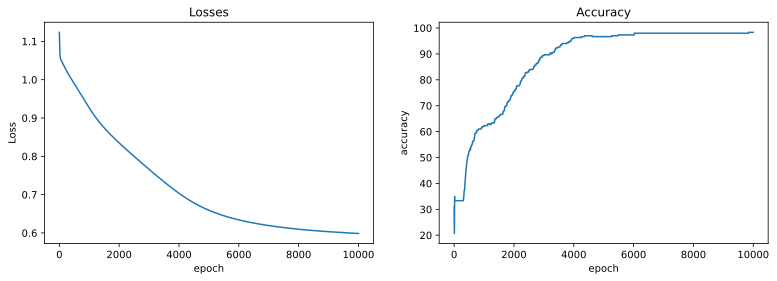

In [262]:
#report accuracy
print('Final Accuracy: %g%%'  %totalacc)

fig,ax = plt.subplots(1,2, figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()





In [263]:
#Confirm that all model predictions sum to 1
#The sum of all of the row should equal to one for each element (each data point which is an x and y)
torch.sum(yHat, axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

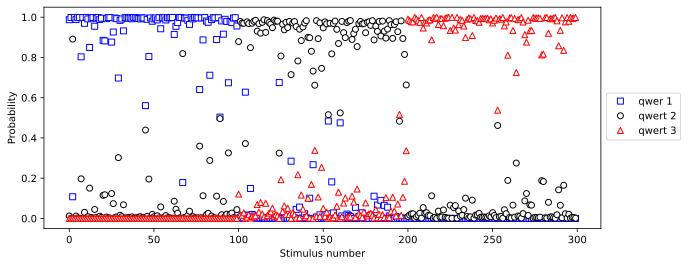

In [264]:
#Plot the raw model outputs
fig = plt.figure(figsize=(10,4))

colorshape = [ 'bs', 'ko', 'r^']
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwer 1', 'qwert 2', 'qwert 3'], loc=[1.01, .4])
plt.show()
